# Oscillation in eeg 

In [1]:
%load_ext autoreload
%autoreload 2

## Imports 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
import scipy as sp 
import scipy.fftpack
import numpy as np


warnings.filterwarnings('ignore')

## Variables d'environnements 

In [3]:
sampling_rate = 24_000
time = 1/sampling_rate # in seconds
unit_time = 's'
start = 1 # in seconds
end = 1.01 

## Lecture du fichier et ajout des colonnes

Text(0.5, 1.0, 'EEG signal')

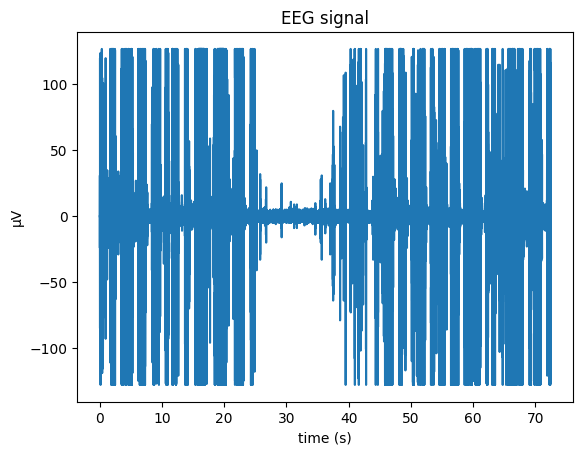

In [4]:
df = pd.read_csv('../../data/EEGArchi13mPFC.txt')
# df = df.iloc[int(start*sampling_rate):int(end*sampling_rate)] # Si on veut ne sélectionner qu'une partie du signal 
df['time'] = df.index * time
df.rename(columns={'0': 'µV'}, inplace=True)
plt.plot(df['time'], df['µV'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('µV')
plt.title('EEG signal')

## Filtration (passe-bas) du signal par les fréquences inférieurs à 12 Hz 

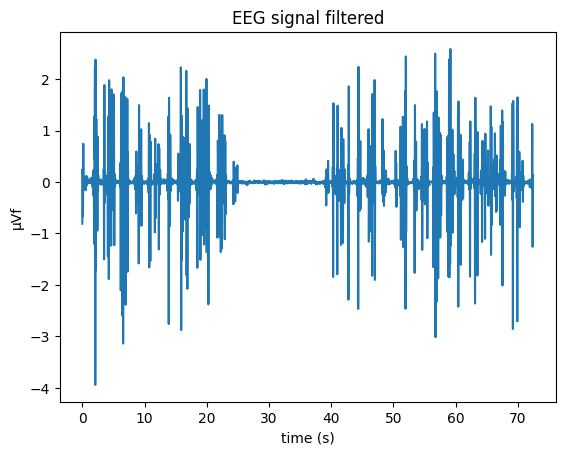

In [8]:
b, a = scipy.signal.iirfilter(4, Wn=12, fs=sampling_rate, btype="low", ftype="butter")
df['µVf'] = scipy.signal.filtfilt(b, a, df['µV'])
plt.plot(df['time'], df['µVf'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('µVf')
plt.title('EEG signal filtered')
plt.savefig('figures/EEG_signal_filtered.png')


## Calcul de la transformée de fourier sur les valeurs filtrées 

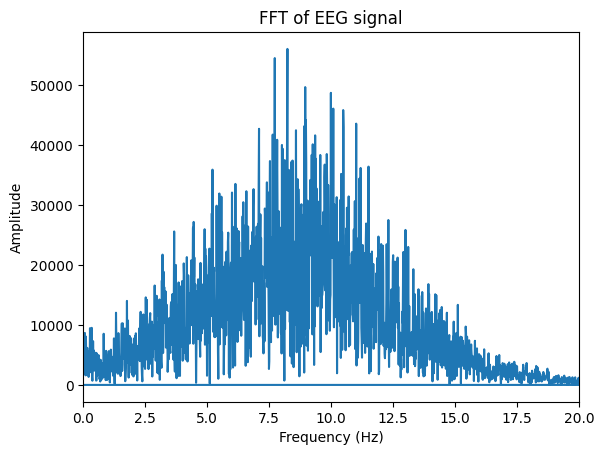

In [7]:
df["amp"] = np.abs(scipy.fftpack.fft(df['µVf'].values))
df["freq"] = scipy.fftpack.fftfreq(df['µVf'].size, d=time)
plt.plot(df["freq"], df["amp"])
plt.xlim(0,20)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of EEG signal")
plt.savefig('figures/FFT_EEG_signal.png')

Ici on vois un pic à 10 Hz ce qui correspond à une onde theta 

On ne vois néamoins pas l'onde delta qui est à 4 Hz

/!\ Surement un problème liée aux bruit dans le signal 

## Transformée de fourrier sur les données non filtrées

Text(0.5, 1.0, 'Fourier transform of the EEG signal')

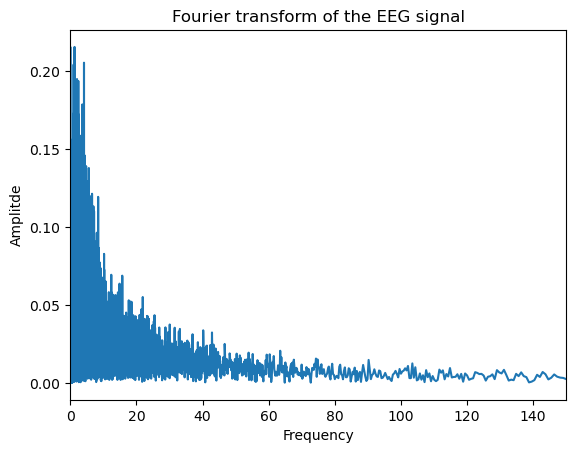

In [149]:
df_f = df.copy()

df_f['amplitude'] = sp.fftpack.fft(df_f['µV'])/len(df_f['µV'])
df_f["freq"] = 1/df_f['time']
plt.plot(df_f['freq'], np.abs(df_f['amplitude']))
plt.xlabel(f'Frequency')
plt.xlim(0, 150)
plt.ylabel('Amplitde')
plt.title('Fourier transform of the EEG signal')

- gamma = 30 Hz 
- Theta = 5-12 Hz

## Essai de créer une heatmap de la fréquence en fonction du temps 

In [162]:
test = sp.signal.cwt(df_f['µV'], sp.signal.morlet2, np.arange(1, 40),dtype="complex128")

In [163]:
len(test), len(test[0]),test[0][0]

(39, 1739499, (0.06578013945583835+0.0044215140216547705j))

<AxesSubplot:>

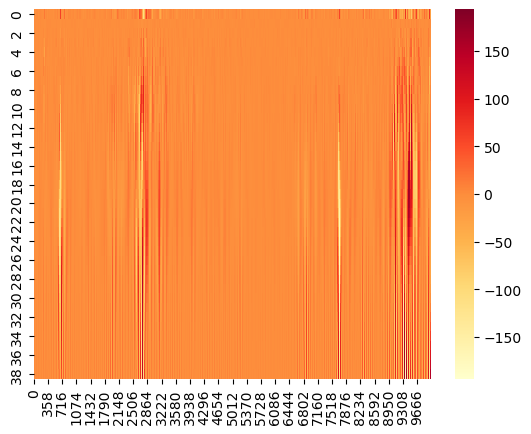

In [166]:
test_df = pd.DataFrame(test)
test_df = test_df.transpose()
test_df.index = df_f['time']
test_df = test_df.iloc[:10_000]
test_df = test_df.to_numpy()
test_df = test_df.real
test_df = test_df.transpose()
sns.heatmap(test_df, cmap="YlOrRd")
# ax = plt.gca()
# ax.set_ylim(8,20)

## Tests BLP non fonctionnel 

In [187]:
res = []
for i in range(len(test)):
    a = np.array(test[i]) 
    a = np.float32(a)
    a = a.real
    res.append(a)
test_2 = sp.signal.cwt(a, sp.signal.morlet2, np.arange(1, 40),dtype="complex128")

# test_2 = pd.DataFrame(test_2)
# test_2 = test_2.transpose()
# test_2.index = df_f['time']
# test_2 = test_2.iloc[:10_000]
# test_2 = test_2.to_numpy()
# test_2 = test_2.real
# test_2 = test_2.transpose()
# sns.heatmap(test_2, cmap="YlOrRd")

ValueError: Length mismatch: Expected axis has 100 elements, new values have 1739499 elements

In [176]:
test = sp.signal.cwt(res, sp.signal.morlet2, np.arange(1, 40),dtype="complex128")
test_df = pd.DataFrame(test)
test_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.011379-0.061685j,-0.019067-0.257946j,-0.492145-0.462558j,-0.704932-0.146001j,-0.710763-0.523706j,-1.710064-0.579399j,-1.665670+0.502796j,-0.941495+0.411034j,-0.579982+0.290235j,-0.398381-0.590157j,...,-1.496673-0.075885j,-0.835308+0.761785j,-0.073534+0.405103j,-0.002109+0.095959j,0.026386-0.053530j,-0.006067-0.398998j,-0.728897-0.904564j,-1.713072-0.331663j,-1.268083+0.532389j,-0.855245+0.306900j
1,0.144072-0.014388j,-0.178861+0.176323j,0.013192-0.362530j,0.337294+0.329194j,-0.585648+0.044064j,0.452634-0.511176j,-0.044853+0.701148j,-0.327496-0.572647j,0.562337+0.258444j,-0.563043+0.192690j,...,0.438098+0.094537j,-0.245271+0.275028j,-0.054624-0.251269j,0.087913+0.068125j,0.029989-0.065528j,0.022549+0.221413j,-0.312530-0.210637j,0.512660-0.130458j,-0.358205+0.519691j,0.001429-0.638310j
2,-0.156984+0.099479j,-0.081530-0.243076j,0.336926-0.029383j,-0.043028+0.418812j,-0.468554-0.100263j,0.097624-0.475224j,0.442834+0.003975j,0.177357+0.387143j,-0.325429+0.402439j,-0.599365-0.267518j,...,0.821363-0.288856j,0.132296+0.750609j,-0.626023-0.025766j,0.181640-0.479313j,0.338597+0.324995j,-0.435208+0.218830j,-0.121927-0.486001j,0.458755-0.044328j,-0.015248+0.356698j,-0.209012-0.053988j
3,0.052642-0.059725j,0.151742+0.088252j,-0.066696+0.302040j,-0.471841+0.062064j,-0.318351-0.584988j,0.553179-0.668060j,1.019709+0.314630j,0.131672+1.247352j,-1.230901+0.711042j,-1.283489-0.899637j,...,0.405012-0.337135j,0.498178+0.214961j,0.061119+0.506738j,-0.338465+0.312517j,-0.430795-0.044405j,-0.264242-0.361094j,0.132045-0.465232j,0.484218-0.156157j,0.381936+0.329989j,-0.085031+0.462590j
4,-0.013721+0.370383j,-0.402192+0.288706j,-0.609915-0.198875j,-0.234070-0.771814j,0.625247-0.761939j,1.166317+0.135827j,0.582565+1.237800j,-0.867294+1.301099j,-1.755219-0.097192j,-0.880554-1.736676j,...,0.857968-0.475670j,0.926288+0.444726j,0.199917+1.049911j,-0.736110+0.817134j,-1.113451-0.082899j,-0.621905-0.926458j,0.334266-1.043345j,0.986576-0.373149j,0.853926+0.508426j,0.122678+0.906369j
5,-0.514298+0.237771j,-0.598072-0.261363j,-0.214446-0.703544j,0.449716-0.676547j,0.879216-0.071192j,0.628365+0.706177j,-0.216191+0.980633j,-0.980705+0.406983j,-0.938039-0.612154j,-0.018536-1.178366j,...,0.886832-0.054853j,0.734558+0.729937j,-0.056461+1.156730j,-0.966530+0.798593j,-1.308462-0.178494j,-0.782039-1.109293j,0.274221-1.335505j,1.138019-0.706895j,1.247282+0.322368j,0.594347+1.056724j
6,-0.487477-0.084772j,-0.307154-0.404808j,0.060291-0.502842j,0.387581-0.299207j,0.453368+0.078784j,0.210877+0.367644j,-0.158478+0.356877j,-0.368294+0.058022j,-0.247451-0.289394j,0.115822-0.397199j,...,0.836321+0.664803j,0.239376+1.110292j,-0.561452+1.061586j,-1.170278+0.463768j,-1.232658-0.428706j,-0.665513-1.158279j,0.259782-1.322909j,1.057189-0.823576j,1.309237+0.068347j,0.910366+0.873240j
7,-0.399285-0.092425j,-0.271308-0.287382j,-0.065641-0.361638j,0.121752-0.303852j,0.218526-0.169233j,0.214719-0.040799j,0.160174+0.024900j,0.122567+0.031255j,0.135265+0.031404j,0.171961+0.081768j,...,0.718932+0.847102j,0.024158+1.128638j,-0.704896+0.911579j,-1.144900+0.277427j,-1.092178-0.502445j,-0.560586-1.084745j,0.219891-1.211308j,0.907912-0.829376j,1.209608-0.114251j,1.012685+0.617489j
8,-0.477944-0.060696j,-0.401244-0.278212j,-0.232524-0.431562j,-0.016757-0.488466j,0.195707-0.444161j,0.363429-0.316269j,0.460456-0.134312j,0.475214+0.069381j,0.406287+0.263365j,0.260541+0.416384j,...,0.425224+0.548967j,-0.049277+0.715314j,-0.529689+0.542277j,-0.803768+0.096656j,-0.744442-0.438314j,-0.363136-0.839645j,0.195411-0.937506j,0.713975-0.684742j,0.992532-0.173998j,0.928148+0.403253j
9,-0.611678-0.127546j,-0.515226-0.393608j,-0.304706-0.594706j,-0.020580-0.683956j,0.279050-0.638087j,0.531328-0.462897j,0.682395-0.192244j,0.699110+0.118936j,0.576509+0.406019j,0.339597+0.608332j,...,0.013526+0.069912j,-0.150027+0.111222j,-0.310663+0.005501j,-0.368479-0.214731j,-0.264058-0.460370j,-0.004918-0.621598j,0.334824-0.612442j,0.641290-0.406299j,0.803428-0.048574j,0.

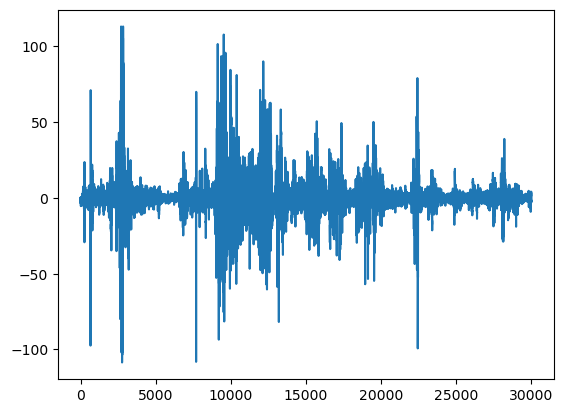

In [99]:
plt.plot(test[0][:30000])

In [152]:
# Create a function to get the band limited power of a signal 
def get_band_power(df, band, sampling_rate):
    # get the fourier transform of the signal 
    df['amplitude'] = sp.fftpack.fft(df['µV'])/len(df['µV'])
    # get the frequency of the signal 
    df["freq"] = 1/df['time']
    # get the power of the signal 
    df['power'] = np.abs(df['amplitude'])**2
    # get the band limited power 
    band_power = df.loc[(df['freq'] >= band[0]) & (df['freq'] <= band[1]), 'power'].sum()
    return band_power

get_band_power(df, [0, 4], sampling_rate)

517.4307830441174